In [28]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt


In [33]:
np.random.seed(42)
n, d = 1000, 20
X = np.random.randn(n, d)
w = np.zeros(d)
w[:5] = np.array([1.5, -2.0, 0.7, -1.2, 0.3])
epsilon = np.random.normal(0, 0.1, n)
y = X @ w + epsilon  # y = Xw + ε

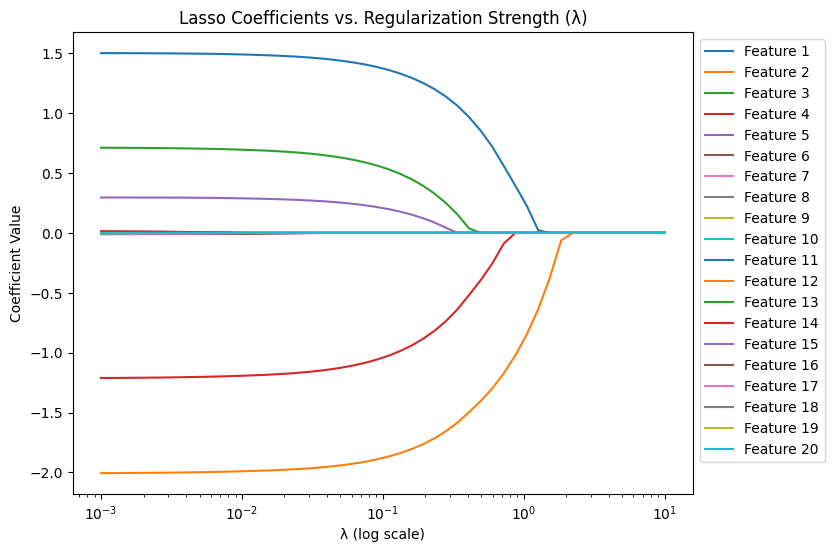

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100, random_state=42)

rus = np.logspace(-3, 1, 50)
coefs = []
for ru in rus:
    lasso = Lasso(alpha=ru, max_iter=10000)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

plt.figure(figsize=(8,6))
for i in range(d):
    plt.plot(rus, [c[i] for c in coefs], label=f'Feature {i+1}')
plt.xscale('log')
plt.xlabel('λ (log scale)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients vs. Regularization Strength (λ)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [35]:
test_errors = []
for ru in rus:
    lasso = Lasso(alpha=ru, max_iter=10000)
    lasso.fit(X_train, y_train)
    test_errors.append(np.mean((lasso.predict(X_test) - y_test)**2))

best_ru = rus[np.argmin(test_errors)]
best_lasso = Lasso(alpha=best_ru, max_iter=10000)
best_lasso.fit(X_train, y_train)
test_error = np.min(test_errors)

# Expected test error in large sample
X_large = np.random.randn(1000000, d)
y_large = X_large @ w + np.random.normal(0, 0.1, 1000000)
expected_error = np.mean((best_lasso.predict(X_large) - y_large)**2)

print(f"Best λ: {best_ru:.4f}")
print(f"Test Error: {test_error:.4f}")
print(f"Expected Test Error: {expected_error:.4f}")

Best λ: 0.0079
Test Error: 0.0111
Expected Test Error: 0.0105


In [37]:
full_lasso = Lasso(alpha=best_ru, max_iter=10000)
full_lasso.fit(X, y)  # Fit on entire dataset

print("Non-zero coefficients for Training Set:", np.where(best_lasso.coef_ != 0)[0])
print("Non-zero coefficients for Full Dataset:", np.where(full_lasso.coef_ != 0)[0])

Non-zero coefficients for Training Set: [ 0  1  2  3  4  5 13 15 16]
Non-zero coefficients for Full Dataset: [0 1 2 3 4]
